# Twitter Scrapped Data:EDA & Sentiment Prediction
## By- Aarush Kumar
### Dated: April 11,2022

In [1]:
import numpy as np 
import pandas as pd
import re # for regular expressions
import pandas as pd 
pd.set_option("display.max_colwidth", 200)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk # for text manipulation
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [2]:
df = pd.read_csv("/home/aarush100616/Downloads/Projects/Coke Studio EDA/Data/coke_studio.csv")

In [3]:
df

id      conversation_id               created_at  \
0     1510406144988123136  1510406144988123136  2022-04-02 23:57:41 UTC   
1     1510403180965867523  1510403180965867523  2022-04-02 23:45:54 UTC   
2     1510392765699567622  1510111348168011776  2022-04-02 23:04:31 UTC   
3     1510385602138566659  1510385602138566659  2022-04-02 22:36:03 UTC   
4     1510381358815727616  1510381358815727616  2022-04-02 22:19:12 UTC   
...                   ...                  ...                      ...   
1410  1507332165150941187  1507332165150941187  2022-03-25 12:22:47 UTC   
1411  1507328362368413700  1507328362368413700  2022-03-25 12:07:41 UTC   
1412  1507326643202838529  1507325443040587780  2022-03-25 12:00:51 UTC   
1413  1507326015340945410  1507325050684325889  2022-03-25 11:58:21 UTC   
1414  1507325050684325889  1507325050684325889  2022-03-25 11:54:31 UTC   

            date      time  timezone              user_id        username  \
0     2022-04-02  23:57:41         0  1397523863408455680    wajibulqatal   
1     2022-04-02  23:45:54         0   834182887373152257       evalee4nc   
2     2022-04-02  23:04:31         0  1485497057138049024       mrwaqasah   
3     2022-04-02  22:36:03         0  1503224455350300672  object0riented   
4     2022-04-02  22:19:12         0   742325690087833600   summedupkenya   
...          ...       ...       ...                  ...             ...   
1410  2022-03-25  12:22:47         0  1350145858680008709    asad98940850   
1411  2022-03-25  12:07:41         0  1393204208221016076       lyrics196   
1412  2022-03-25  12:00:51         0   936254109988151297        ab_shura   
1413  2022-03-25  11:58:21         0  1077653560790179840        lfc_waji   
1414  2022-03-25  11:54:31         0           1168281614     squarhammer   

                                             name  place  ... geo source  \
0                                     Haris Iqbal    NaN  ... NaN    NaN   
1                    EvaLee4NC #DemsDeliver 🇺🇦💙🇺🇸    NaN  ... NaN    NaN   
2                                     Waqas Ahmad    NaN  ... NaN    NaN   
3                                            abir    NaN  ... NaN    NaN   
4                             News SummedUp Kenya    NaN  ... NaN    NaN   
...                                           ...    ...  ...  ..    ...   
1410                                         Asad    NaN  ... NaN    NaN   
1411                                     iLyricss    NaN  ... NaN    NaN   
1412  Abdul Rehmanᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠᅠ    NaN  ... NaN    NaN   
1413                                    Waji وجیھ    NaN  ... NaN    NaN   
1414                                      اسجد 🇵🇸    NaN  ... NaN    NaN   

     user_rt_id user_rt retweet_id  \
0           NaN     NaN        NaN   
1           NaN     NaN        NaN   
2           NaN     NaN        NaN   
3           NaN     NaN        NaN   
4           NaN     NaN        NaN   
...         ...     ...        ...   
1410        NaN     NaN        NaN   
1411        NaN     NaN        NaN   
1412        NaN     NaN        NaN   
1413        NaN     NaN        NaN   
1414        NaN     NaN        NaN   

                                                                                                                                                                                         reply_to  \
0                                                                                                                                                                                              []   
1                                                                                                                                                                                              []   
2     [{'screen_name': 'SalmanSufi7', 'name': 'Salman Sufi (Wear a Mask to Keep All Safe)', 'id': '1025054978547822592'}, {'screen_name': 'cokestudio', 'name': 'Coke Studio', 'id': '41097723'}]   
3                                      

In [4]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)

Dataset size: (1415, 36)
Columns are: Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')


In [5]:
# use the drop columns function to streamline the dataset
df = df.drop(columns=['id', 'time','user_id','username','conversation_id','created_at','timezone', 'name', 'place', 'mentions', 'urls', 'photos', 'replies_count', 'likes_count', 'cashtags', 'link', 'retweet','retweets_count', 'quote_url', 'video', 'near', 'geo', 'source', 'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date'])
df.head(10)

date  \
0  2022-04-02   
1  2022-04-02   
2  2022-04-02   
3  2022-04-02   
4  2022-04-02   
5  2022-04-02   
6  2022-04-02   
7  2022-04-02   
8  2022-04-02   
9  2022-04-02   

                                                                                                                                                                                                     tweet  \
0                                                                                                                        Pakistanis be avoiding music whole Ramzan but listening to Coke Studio Qawalis🤡🤡🤡   
1                                                                                                                                                                         @cokestudio coke coffee? cofefe?   
2                                 @SalmanSufi7 @cokestudio Coke Studio does not run on foreign funding, neither it carries foreign agenda. These NGOs everyone know are working on funds &amp; has agenda.   
3                                                                                                                                                                           why is there no coke studio us   
4                                                                                                                       Coke studio Bangla drops second song by Momtaz and Mizan   https://t.co/Bxfym1wfgR   
5                                                                                          Music coming out of Pakistan has been incredible recently. Quite possibly the best coke studio season to date 🎧   
6  @anuskills3 Haikwenda kwa ukubwa ndo maana baada ya hapo show za nje zilififia akaishia kupiga show  E. Africa  Angalau ujio wa coke studio ukamuinua ila bado akajisahau tena nyumbani wanataka nin...   
7  @Giant962 @anuskills3 Ile project haikuwa kubwa na haikuenda kwa kasi ndo maana baada ya hapo anguko la alikiba likawa kubwa ashukuru tu aliingia kwenye coke studio Africa akawa anaendeleza jina l...   
8   Ramadan Mubarak! May Almighty Allah forgive us in this great month. The 99 names of Allah (SWT)  Coke Studio Special | Asma-ul-Husna | The 99 Names | Atif Aslam  https://t.co/3EVESONNdf via @YouTube   
9                                                                                                                     @HBukhari I'm sure it's the last coke studio song "phir milenge". Such great poetry.   

  language hashtags thumbnail  translate  trans_src  trans_dest  
0       en       []       NaN        NaN        NaN         NaN  
1       en       []       NaN        NaN        NaN         NaN  
2       en       []       NaN        NaN        NaN         NaN  
3       en       []       NaN        NaN        NaN         NaN  
4       en       []       NaN        NaN        NaN         NaN  
5       en       []       NaN        NaN        NaN         NaN  
6       in       []       NaN        NaN        NaN         NaN  
7       tl       []       NaN        NaN        NaN         NaN  
8       en       []       NaN        NaN        NaN         NaN  
9       en       []       NaN        NaN        NaN         NaN

In [6]:
print('Dataset size:',df.shape)
print('Columns are:',df.columns)
df.info()

Dataset size: (1415, 8)
Columns are: Index(['date', 'tweet', 'language', 'hashtags', 'thumbnail', 'translate',
       'trans_src', 'trans_dest'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1415 non-null   object 
 1   tweet       1415 non-null   object 
 2   language    1415 non-null   object 
 3   hashtags    1415 non-null   object 
 4   thumbnail   111 non-null    object 
 5   translate   0 non-null      float64
 6   trans_src   0 non-null      float64
 7   trans_dest  0 non-null      float64
dtypes: float64(3), object(5)
memory usage: 88.6+ KB


In [7]:
#convert data to datetime and strings for manipulation.
df["tweet"]= df["tweet"].astype(str)
df['date']= pd.to_datetime(df['date'], infer_datetime_format=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1415 entries, 0 to 1414
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1415 non-null   datetime64[ns]
 1   tweet       1415 non-null   object        
 2   language    1415 non-null   object        
 3   hashtags    1415 non-null   object        
 4   thumbnail   111 non-null    object        
 5   translate   0 non-null      float64       
 6   trans_src   0 non-null      float64       
 7   trans_dest  0 non-null      float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 88.6+ KB


## Data Pre-processing

In [8]:
import string
import nltk
from nltk.corpus import stopwords
from nltk import re

In [9]:
MIN_YEAR = 1900
MAX_YEAR = 2100

In [10]:
def get_url_patern():
    return re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))'
        r'[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})')

In [11]:
def get_emojis_pattern():
    try:
        # UCS-4
        emojis_pattern = re.compile(u'([\U00002600-\U000027BF])|([\U0001f300-\U0001f64F])|([\U0001f680-\U0001f6FF])')
    except re.error:
        # UCS-2
        emojis_pattern = re.compile(
            u'([\u2600-\u27BF])|([\uD83C][\uDF00-\uDFFF])|([\uD83D][\uDC00-\uDE4F])|([\uD83D][\uDE80-\uDEFF])')
    return emojis_pattern

In [12]:
def get_hashtags_pattern():
    return re.compile(r'#\w*')
def get_single_letter_words_pattern():
    return re.compile(r'(?<![\w\-])\w(?![\w\-])')
def get_blank_spaces_pattern():
    return re.compile(r'\s{2,}|\t')
def get_twitter_reserved_words_pattern():
    return re.compile(r'(RT|rt|FAV|fav|VIA|via)')
def get_mentions_pattern():
    return re.compile(r'@\w*')
def is_year(text):
    if (len(text) == 3 or len(text) == 4) and (MIN_YEAR < len(text) < MAX_YEAR):
        return True
    else:
        return False

In [13]:
class TwitterPreprocessor:
    def __init__(self, text: str):
        self.text = text
    def fully_preprocess(self):
        return self \
            .remove_urls() \
            .remove_mentions() \
            .remove_hashtags() \
            .remove_twitter_reserved_words() \
            .remove_punctuation() \
            .remove_single_letter_words() \
            .remove_blank_spaces() \
            .remove_stopwords() \
            .remove_numbers()
    def remove_urls(self):
        self.text = re.sub(pattern=get_url_patern(), repl='', string=self.text)
        return self
    def remove_punctuation(self):
        self.text = self.text.translate(str.maketrans('', '', string.punctuation))
        return self
    def remove_mentions(self):
        self.text = re.sub(pattern=get_mentions_pattern(), repl='', string=self.text)
        return self
    def remove_hashtags(self):
        self.text = re.sub(pattern=get_hashtags_pattern(), repl='', string=self.text)
        return self
    def remove_twitter_reserved_words(self):
        self.text = re.sub(pattern=get_twitter_reserved_words_pattern(), repl='', string=self.text)
        return self
    def remove_single_letter_words(self):
        self.text = re.sub(pattern=get_single_letter_words_pattern(), repl='', string=self.text)
        return self
    def remove_blank_spaces(self):
        self.text = re.sub(pattern=get_blank_spaces_pattern(), repl=' ', string=self.text)
        return self
    def remove_stopwords(self, extra_stopwords=None):
        if extra_stopwords is None:
            extra_stopwords = []
        text = nltk.word_tokenize(self.text)
        stop_words = set(stopwords.words('english'))
        new_sentence = []
        for w in text:
            if w not in stop_words and w not in extra_stopwords:
                new_sentence.append(w)
        self.text = ' '.join(new_sentence)
        return self
    def remove_numbers(self, preserve_years=False):
        text_list = self.text.split(' ')
        for text in text_list:
            if text.isnumeric():
                if preserve_years:
                    if not is_year(text):
                        text_list.remove(text)
                else:
                    text_list.remove(text)

        self.text = ' '.join(text_list)
        return self
    def lowercase(self):
        self.text = self.text.lower()
        return self

In [14]:
# Clean tweets and append to new column
tweets = df['tweet']
clean_tweets = []
for tweet in tweets:
    c = TwitterPreprocessor((tweet))
    c.fully_preprocess()
    c = c.text
    clean_tweets.append(c)
    
df['clean_tweets'] = clean_tweets 
df.head(5)

date  \
0 2022-04-02   
1 2022-04-02   
2 2022-04-02   
3 2022-04-02   
4 2022-04-02   

                                                                                                                                                                      tweet  \
0                                                                                         Pakistanis be avoiding music whole Ramzan but listening to Coke Studio Qawalis🤡🤡🤡   
1                                                                                                                                          @cokestudio coke coffee? cofefe?   
2  @SalmanSufi7 @cokestudio Coke Studio does not run on foreign funding, neither it carries foreign agenda. These NGOs everyone know are working on funds &amp; has agenda.   
3                                                                                                                                            why is there no coke studio us   
4                                                                                        Coke studio Bangla drops second song by Momtaz and Mizan   https://t.co/Bxfym1wfgR   

  language hashtags thumbnail  translate  trans_src  trans_dest  \
0       en       []       NaN        NaN        NaN         NaN   
1       en       []       NaN        NaN        NaN         NaN   
2       en       []       NaN        NaN        NaN         NaN   
3       en       []       NaN        NaN        NaN         NaN   
4       en       []       NaN        NaN        NaN         NaN   

                                                                                                       clean_tweets  
0                                           Pakistanis avoiding music whole Ramzan listening Coke Studio Qawalis🤡🤡🤡  
1                                                                                                coke coffee cofefe  
2  Coke Studio run foreign funding neither carries foreign agenda These NGOs everyone know working funds amp agenda  
3                                                                                                    coke studio us  
4                                                                 Coke studio Bangla drops second song Momtaz Mizan

## Story Generation and Visualization from Tweets

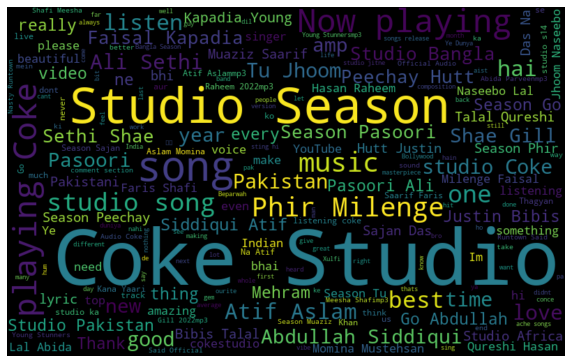

In [15]:
all_words = ' '.join([text for text in df['clean_tweets']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Sentiment Analysis Using VADER

In [16]:
import nltk
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/aarush100616/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

(array([  4.,   7.,  22.,  31.,  21.,  38.,  19.,  23.,  15., 691.,  13.,
        128.,  30.,  54.,  79.,  54.,  87.,  46.,  33.,  20.]),
 array([-0.9055 , -0.81086, -0.71622, -0.62158, -0.52694, -0.4323 ,
        -0.33766, -0.24302, -0.14838, -0.05374,  0.0409 ,  0.13554,
         0.23018,  0.32482,  0.41946,  0.5141 ,  0.60874,  0.70338,
         0.79802,  0.89266,  0.9873 ]),
 <a list of 20 Patch objects>)

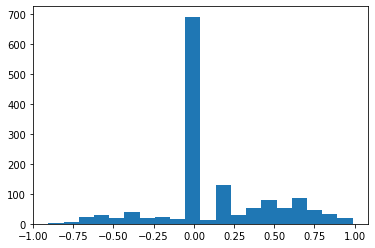

In [18]:
# create analyzer object 
analyzer = SentimentIntensityAnalyzer()
# get a list of scores and plot
scores = [analyzer.polarity_scores(tweet)['compound'] for tweet in df['clean_tweets']]
plt.hist(scores, bins=20)

In [19]:
sentiment = df['clean_tweets'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df,sentiment.apply(pd.Series)],1)
df.head(5)

date  \
0 2022-04-02   
1 2022-04-02   
2 2022-04-02   
3 2022-04-02   
4 2022-04-02   

                                                                                                                                                                      tweet  \
0                                                                                         Pakistanis be avoiding music whole Ramzan but listening to Coke Studio Qawalis🤡🤡🤡   
1                                                                                                                                          @cokestudio coke coffee? cofefe?   
2  @SalmanSufi7 @cokestudio Coke Studio does not run on foreign funding, neither it carries foreign agenda. These NGOs everyone know are working on funds &amp; has agenda.   
3                                                                                                                                            why is there no coke studio us   
4                                                                                        Coke studio Bangla drops second song by Momtaz and Mizan   https://t.co/Bxfym1wfgR   

  language hashtags thumbnail  translate  trans_src  trans_dest  \
0       en       []       NaN        NaN        NaN         NaN   
1       en       []       NaN        NaN        NaN         NaN   
2       en       []       NaN        NaN        NaN         NaN   
3       en       []       NaN        NaN        NaN         NaN   
4       en       []       NaN        NaN        NaN         NaN   

                                                                                                       clean_tweets  \
0                                           Pakistanis avoiding music whole Ramzan listening Coke Studio Qawalis🤡🤡🤡   
1                                                                                                coke coffee cofefe   
2  Coke Studio run foreign funding neither carries foreign agenda These NGOs everyone know working funds amp agenda   
3                                                                                                    coke studio us   
4                                                                 Coke studio Bangla drops second song Momtaz Mizan   

     neg    neu  pos  compound  
0  0.231  0.769  0.0     -0.34  
1  0.000  1.000  0.0      0.00  
2  0.000  1.000  0.0      0.00  
3  0.000  1.000  0.0      0.00  
4  0.000  1.000  0.0      0.00

## Analyzing Sentiment

In [20]:
df.describe()

translate  trans_src  trans_dest          neg          neu  \
count        0.0        0.0         0.0  1415.000000  1415.000000   
mean         NaN        NaN         NaN     0.042563     0.828490   
std          NaN        NaN         NaN     0.109189     0.210906   
min          NaN        NaN         NaN     0.000000     0.000000   
25%          NaN        NaN         NaN     0.000000     0.687500   
50%          NaN        NaN         NaN     0.000000     0.878000   
75%          NaN        NaN         NaN     0.000000     1.000000   
max          NaN        NaN         NaN     0.778000     1.000000   

               pos     compound  
count  1415.000000  1415.000000  
mean      0.120457     0.129038  
std       0.178270     0.345200  
min       0.000000    -0.905500  
25%       0.000000     0.000000  
50%       0.000000     0.000000  
75%       0.209000     0.361200  
max       1.000000     0.987300

In [21]:
df.index = pd.to_datetime(df['date'])
df = df.sort_index()
df['mean'] = df['compound'].expanding().mean()
df['rolling'] = df['compound'].rolling('1d').mean()

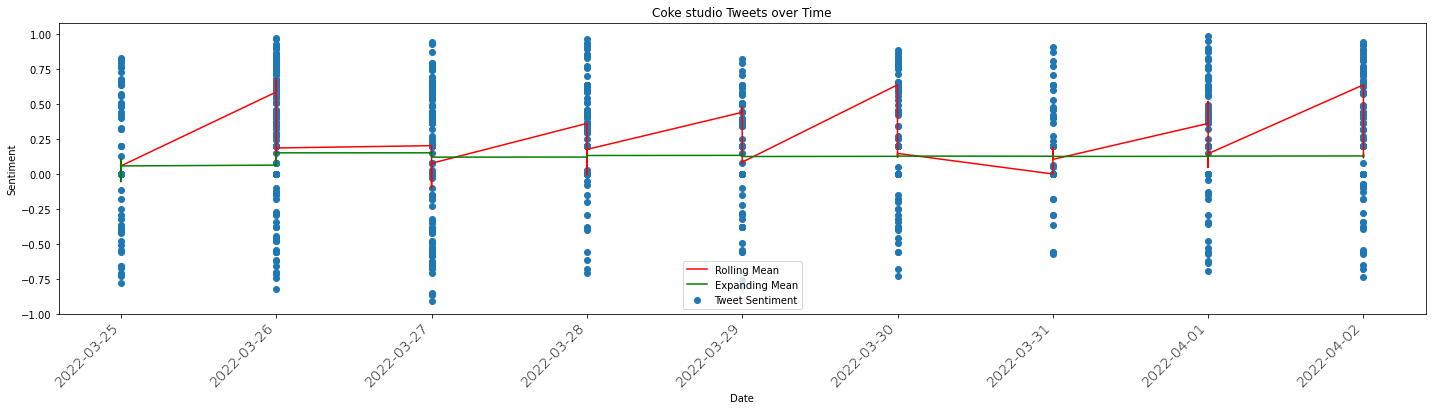

In [22]:
import datetime as dt
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
ax.scatter(df['date'],df['compound'], label='Tweet Sentiment')
ax.plot(df['date'],df['rolling'], color ='r', label='Rolling Mean')
ax.plot(df['date'],df['mean'], color='g', label='Expanding Mean')
ax.set(title='Coke studio Tweets over Time', xlabel='Date', ylabel='Sentiment')
ax.legend(loc='best')
fig.tight_layout()
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.show()

/home/aarush100616/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


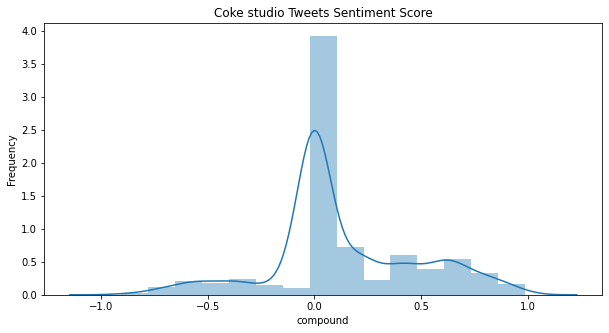

In [23]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set(title='Coke studio Tweets Sentiment Score', xlabel='Compund Sentiment Score', ylabel='Frequency')
sns.distplot(df['compound'], bins=15, ax=ax)
plt.show()